Zomato is a food delivery app and has an average of 17.5 million monthly transacting customers for its food delivery business. This dataset contains the information about the restaurants from all over the world that can be found in Bengaluru . Here, I am assuming to be working in a data-driven role at Zomato and I have a dataset of customers. As a data professional, I need to analyze the data,perform EDA(Exploratory Data Analysis) and visualization.

In [1]:
#Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

There are several options for getting the dataset into Jupyter:

1)Download the CSV manually and upload it via Jupyter's GUI

2)Use the urlretrieve function from the urllib.request to download CSV files from a raw URL

3)Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for direct download.



I have downloaded the dataset using the opendatasets library that allows us to download datasets directly from curated sources like Kaggle, using a helper function for direct download.

By using od.download(download_url, force=True), I am fetching the dataset from Kaggle directly into Jupyter, without manually downloading and uploading the CSV file.


In [3]:
pip install opendatasets --upgrade --quiet


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: C:\Users\DELL\anaconda3\python.exe -m pip install --upgrade pip


In [4]:
#Downloaded the dataset from Kaggle into Jupyter directly using opendatasets library

import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants'
od.download(download_url, force= True)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: seemaacharya
Your Kaggle Key: ········
Dataset URL: https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants


100%|█████████████████████████████████████████████████████████████████████████████| 89.0M/89.0M [00:26<00:00, 3.55MB/s]


In [5]:
data_filename = './zomato-bangalore-restaurants/zomato.csv'


In [6]:
df = pd.read_csv(data_filename)


In [7]:
df

# This dataset contains 51717 rows and 17 columns

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [8]:
df.columns


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
len(df.columns)


17

In [10]:
#find the no. of rows
len(df)


51717

## Data Preparation and Cleaning

Clean the data

- Take a copy of the dataset and work on that. Any changes made on the copy will not affect the main dataset
- change the name of columns if you want to avoid syntax errors
- Remove/drop unwanted columns
- Use describe to roughly check the average votes in total
- check for null values
- To find the columns that have missing values and missing values percentage
- To find the unique values in 'rate' column
- Convert the values in the rate column from formats like "4.2/5" to just "4.2", cleaning the data by removing the part after    the slash and any unnecessary spaces.
- get the unique values in rate col
- Replace the occurrences of 'NEW' and '-' in the rate column of the DataFrame with 0, modifying the DataFrame in place.



Let's extract a copy of the data from these columns into a new data frame copy_df. We can continue to modify further without affecting the original data frame.



In [11]:
copy_df = df.copy()


In [12]:
copy_df.shape

#The dataset has 51717 rows and 17 columns

(51717, 17)

In [13]:
#removing unnecessary columns. These columns are not required for our analysis
#we can't perform any analysis on url, address as we already have location for our analysis, and rest of below mentioned cols as we cannot perform any analysis on these.

copy_df=copy_df.drop(['url','address','phone','menu_item', 'listed_in(city)','reviews_list'],axis=1)


In [14]:
copy_df.shape


(51717, 11)

In [15]:
# to get statistical summary of numerical column

copy_df.describe()


,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [16]:
#to find the missing values and sort them from descending to ascending

copy_df.isna().sum().sort_values(ascending=False)


dish_liked                     28078
rate                            7775
approx_cost(for two people)      346
rest_type                        227
cuisines                          45
location                          21
name                               0
online_order                       0
book_table                         0
votes                              0
listed_in(type)                    0
dtype: int64

Data Cleaning

In [17]:
#to find the columns that have missing values
feature_na= [i for i in copy_df.columns if copy_df[i].isnull().sum()>0]
feature_na

['rate',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [18]:
#to find the missing/null values percentage in our dataset
for i in feature_na:
    print(f"{i} has {np.round((copy_df[i].isnull().sum()/len(copy_df[i])*100),4)}% null values")

rate has 15.0337% null values
location has 0.0406% null values
rest_type has 0.4389% null values
dish_liked has 54.2916% null values
cuisines has 0.087% null values
approx_cost(for two people) has 0.669% null values


In [19]:
#to find the unique values in 'rate' column
copy_df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [20]:
#remove all rows from the DataFrame where the rate column has missing (NaN) values, updating the DataFrame in place.
copy_df.dropna(subset=['rate'],axis=0,inplace=True)


In [21]:
#convert the data type of the "rate" col
def split(x):
    return x.split('/')[0].strip()


In [22]:
copy_df['rate'] = copy_df['rate'].apply(split)


In [23]:
copy_df['rate']


0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 43942, dtype: object

In [24]:
copy_df.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '-',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [25]:
# replace all occurrences of 'NEW' and '-' in the rate column with 0, directly updating the DataFrame.

copy_df['rate'].replace(['NEW','-'],0,inplace=True)

In [26]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43942 non-null  object
 1   online_order                 43942 non-null  object
 2   book_table                   43942 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        43942 non-null  int64 
 5   location                     43942 non-null  object
 6   rest_type                    43791 non-null  object
 7   dish_liked                   23609 non-null  object
 8   cuisines                     43931 non-null  object
 9   approx_cost(for two people)  43690 non-null  object
 10  listed_in(type)              43942 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.0+ MB


In [27]:
copy_df['rate'] = copy_df['rate'].astype(float)

In [28]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         43942 non-null  object 
 1   online_order                 43942 non-null  object 
 2   book_table                   43942 non-null  object 
 3   rate                         43942 non-null  float64
 4   votes                        43942 non-null  int64  
 5   location                     43942 non-null  object 
 6   rest_type                    43791 non-null  object 
 7   dish_liked                   23609 non-null  object 
 8   cuisines                     43931 non-null  object 
 9   approx_cost(for two people)  43690 non-null  object 
 10  listed_in(type)              43942 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.0+ MB


Exploratory Analysis and Visualization

Columns we will analyse

1) rate
2) name
3) online_order
4) book_table
5) rest_type
6) votes
7) location
8) cuisines
9) listed_in(type)
10) approx_cost(for two people)


In [ ]:
Problem Statements-

1) rate

# Question:
# calculate avg rating for each restaurant?
# What are the ratings that the majority of the restaurants have recieved or the distribution of ratings? 


2) name- 
#Question-
#Name the top restaurant chains?
 
3) online_order-
#question-
#How many restaurants don't accept online orders?
# which mode (online or offline) has received the maximum rating?


4) book_table- 
#question- 
#How many reastaurants had TABLE BOOKINGS?

5) rest_type 
#Question:
#What type of restaurant do the majority of customers order from?
#Also which restaurant type most of the people living there prefer?


6) votes
#Question:
# Which "restaurant" had the highest "voting"? (means count of rating given)
# How many "votes" has each "type of restaurant" received from customers?

7) location
#Question-  
#In which location we have highest number of restaurants

8) cuisines- 
#Question- 
#Identify the top 10 cuisines

9) approx_cost(for two people)-
#Question- 
#Zomato has observed that most couples order most of their food online. What is their average spending on each other / or CHeck the distribution for cost of 2 people?



# 1) rate

# Question:
# calculate avg rating for each restaurant?
# What are the ratings that the majority of the restaurants have recieved or the distribution of ratings? 

In [29]:
rating = pd.pivot_table(copy_df,index='name',values='rate')
rating

,rate
name,
#FeelTheROLL,3.400000
#L-81 Cafe,3.900000
#refuel,3.700000
1000 B.C,3.200000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
...,...
i-Bar - The Park Bangalore,3.800000
iFruit Live Ice Creams,3.400000
iSpice Resto Cafe,3.700000


In [30]:
rating=rating.sort_values(['rate'],ascending=False)
rating[0:20]

,rate
name,
Asia Kitchen By Mainland China,4.900000
Byg Brewski Brewing Company,4.900000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine,4.900000
Punjab Grill,4.871429
Belgian Waffle Factory,4.844828
O.G. Variar & Sons,4.800000
Flechazo,4.800000
The Pizza Bakery,4.800000
AB's - Absolute Barbecues,4.789474


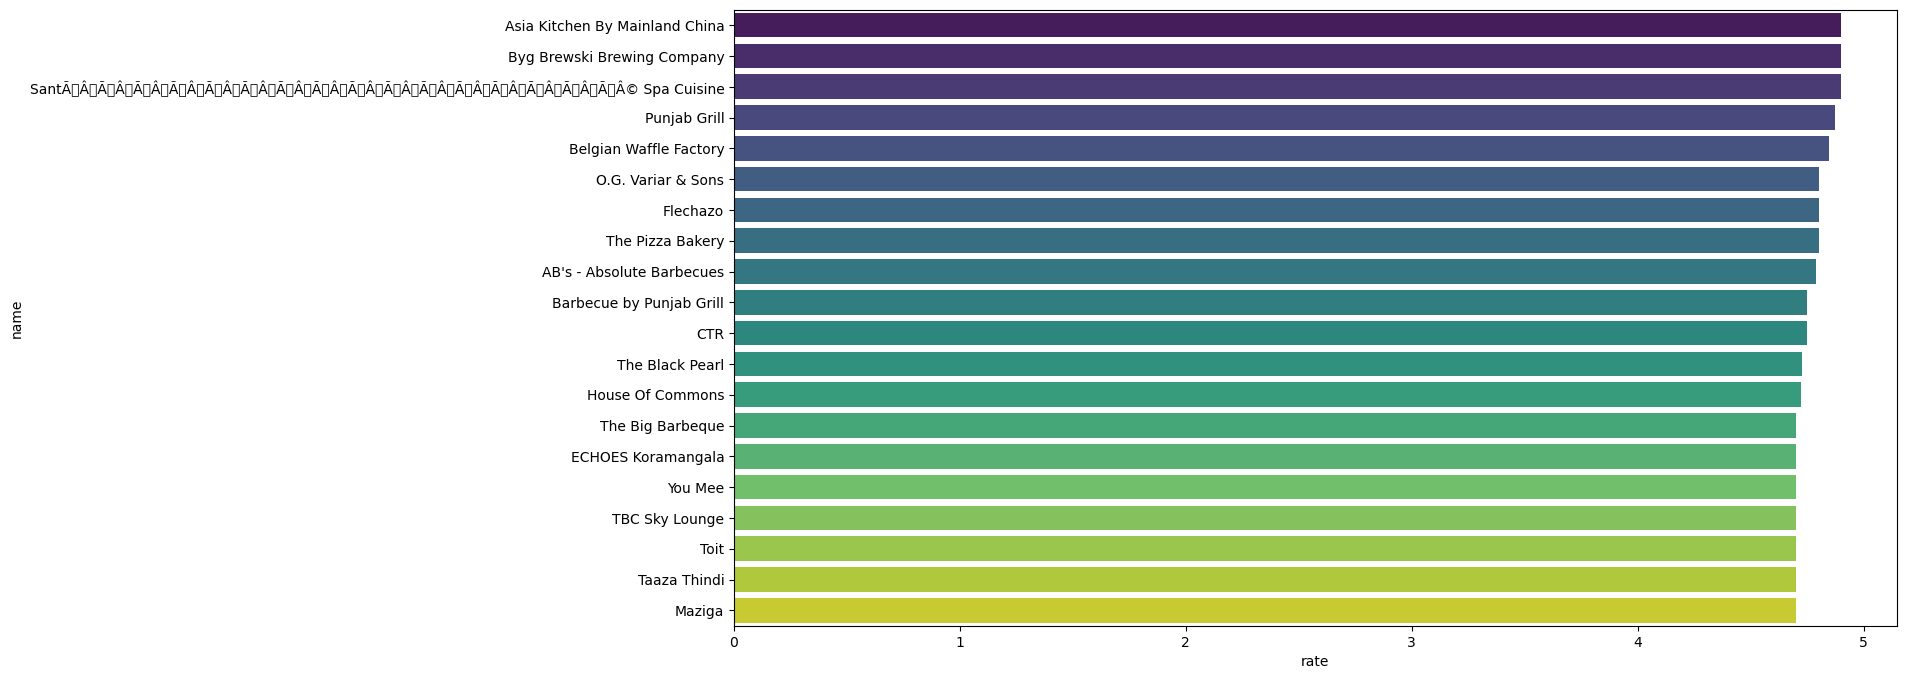

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(x=rating[0:20].rate, y=rating[0:20].index, orient="h", palette="viridis")
plt.show()


# Conclusion- we can see that the top restaurants have the highest number of average ratings. Asia Kitchen By Mainland China,Spa Cuisine,Byg Brewski Brewing Company,Punjab Grill were the best rated Restaurants.


## Distribution of ratings

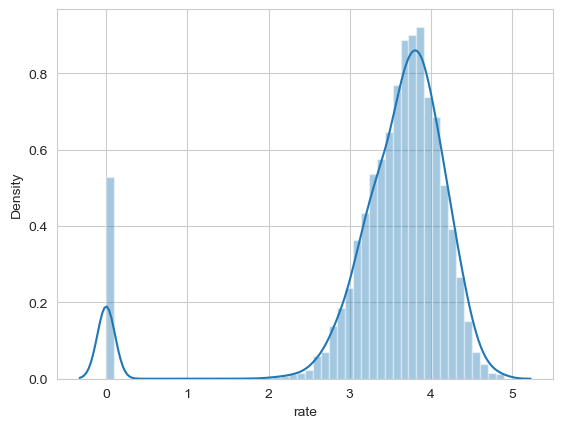

In [32]:
sns.set_style('whitegrid')
sns.distplot(copy_df['rate'])

plt.show()

The column "rate" is not normally distibuted as we can see a spike in '0's i.e the new resturants. Also, majority of restaurants have received the ratings from 2.5 to 4.5

In [33]:
from scipy.stats import normaltest

DataToTest = copy_df['rate']

stat,p = normaltest(DataToTest)

print("stat=%0.2f,p=%0.30f" % (stat,p))

if p>0.05:
    print("Normal distribution")
else:
    print("Not a normal distribution")
    
#Here p value is less than 0.05 meaning the rate col is not normally distributed.    

stat=24555.12,p=0.000000000000000000000000000000
Not a normal distribution


## 2) name
## Question- List out the top restaurant chains

In [34]:
copy_df['name'].value_counts()

Cafe Coffee Day               89
Onesta                        85
Empire Restaurant             71
Just Bake                     68
Five Star Chicken             68
                              ..
SV Food Garden                 1
Ginger restaurant              1
Darjeeling Hot Momos           1
Sri Annapoorna Andhra Mess     1
SeeYa Restaurant               1
Name: name, Length: 7162, dtype: int64

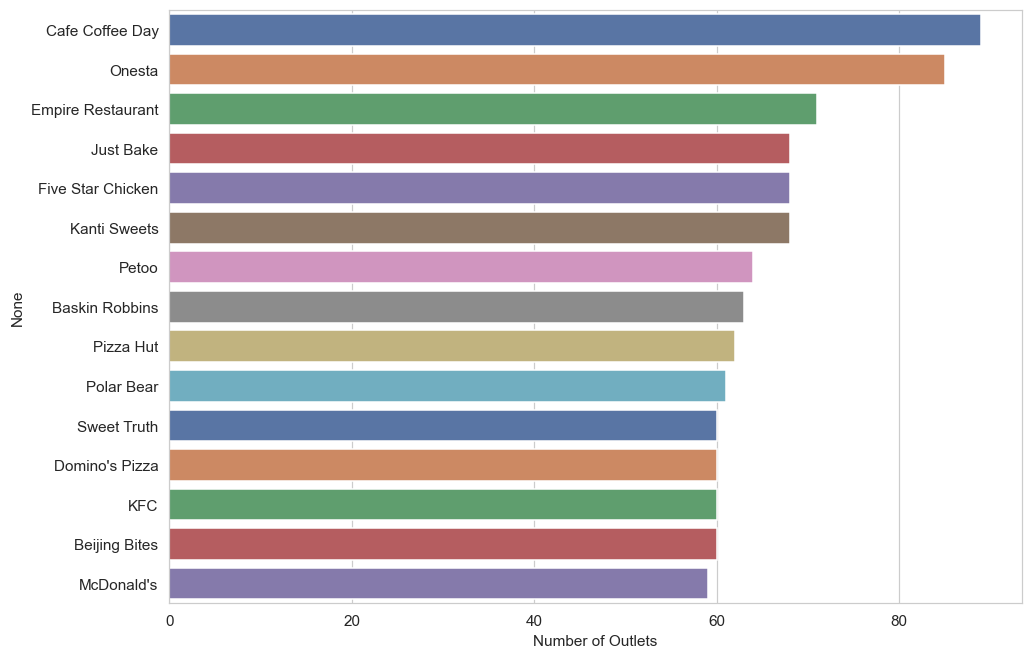

In [35]:
plt.figure(figsize=(10,7), dpi=110)

chains = copy_df['name'].value_counts()[0:15]

sns.barplot(x=chains.values, y=chains.index, palette='deep')
plt.xlabel("Number of Outlets")

plt.show()


# Conclusion- These are the top restaurant chains...'cafe coffee day' being at the top


# 3) online_order
# Question
# How many restaurants don't accept online orders?
# which mode (online or offline) has received the maximum rating?

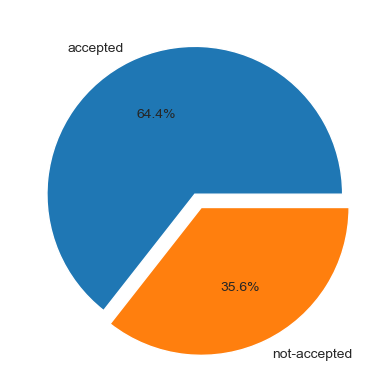

In [36]:
x = copy_df.online_order.value_counts()
labels = ['accepted','not-accepted']
plt.pie(x,labels=labels,explode=[0.0,0.1],autopct='%1.1f%%')

plt.show()

<Axes: xlabel='online_order', ylabel='rate'>

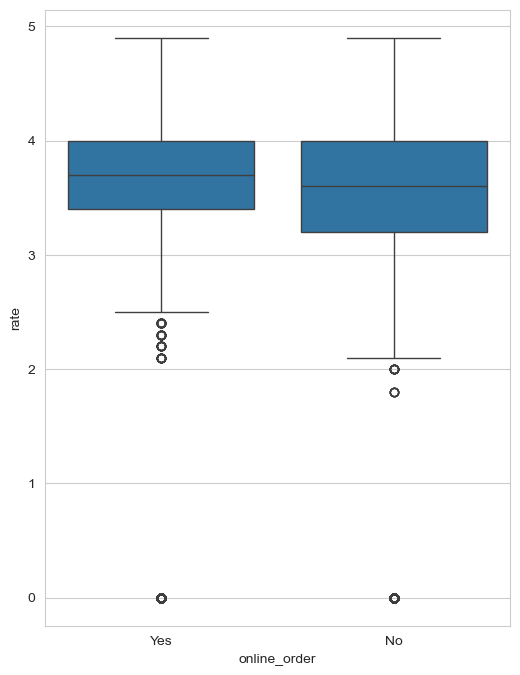

In [81]:
plt.figure(figsize= (6,8)),
sns.boxplot(x='online_order', y='rate', data=copy_df)

# Conclusion- we see that around 64.4% of restaurants accept online orders.
# Also, we see that offline order received lower rating in comaparison to online_order.

# 4)book_table
# Question- How many restaurants had TABLE BOOKINGS?

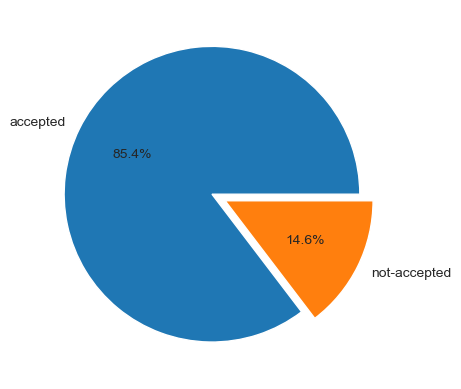

In [37]:
x = copy_df.book_table.value_counts()
labels = ['accepted','not-accepted']
plt.pie(x,labels=labels,explode=[0.0,0.1],autopct='%1.1f%%')

plt.show()

# Conclusion-we observe here that around 85.4% resturants have table bookings.

# 5) Analysis on type of restaurants-

# Question:
# What type of restaurant do the majority of customers order from?
# Also which restaurant type most of the people living there prefer?

In [38]:
copy_df.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


Text(0.5, 0, 'type of restaurant')

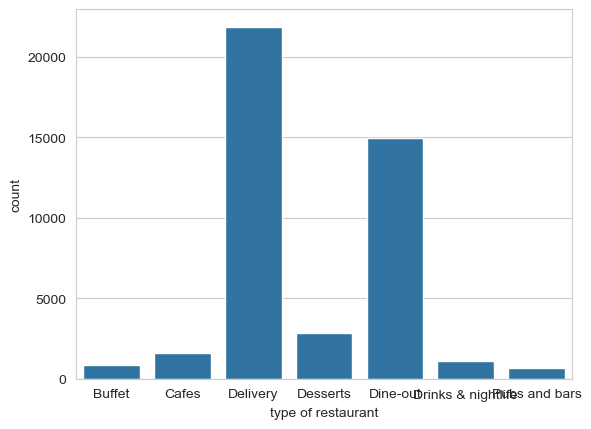

In [39]:
sns.countplot(x=copy_df["listed_in(type)"])
plt.xlabel("type of restaurant")

# Conclusion- We see that majority of the customers (nearly 23000 of the orders are placed) from "Delivery" rest_type.

In [40]:
copy_df.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [41]:
len(copy_df.rest_type.unique())

#we see that there are 88 unique restaurant types in the rest_type column of this dataset.

88

In [42]:
copy_df.rest_type.value_counts()

#Here it shows the frequency of each type of restaurant (rest_type) in the dataset. 
#Interpretation- there are 15,073 entries in the dataset where the restaurant type is "Quick Bites" and there is only one entry where a restaurant is both a quick bite and a kiosk.

Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

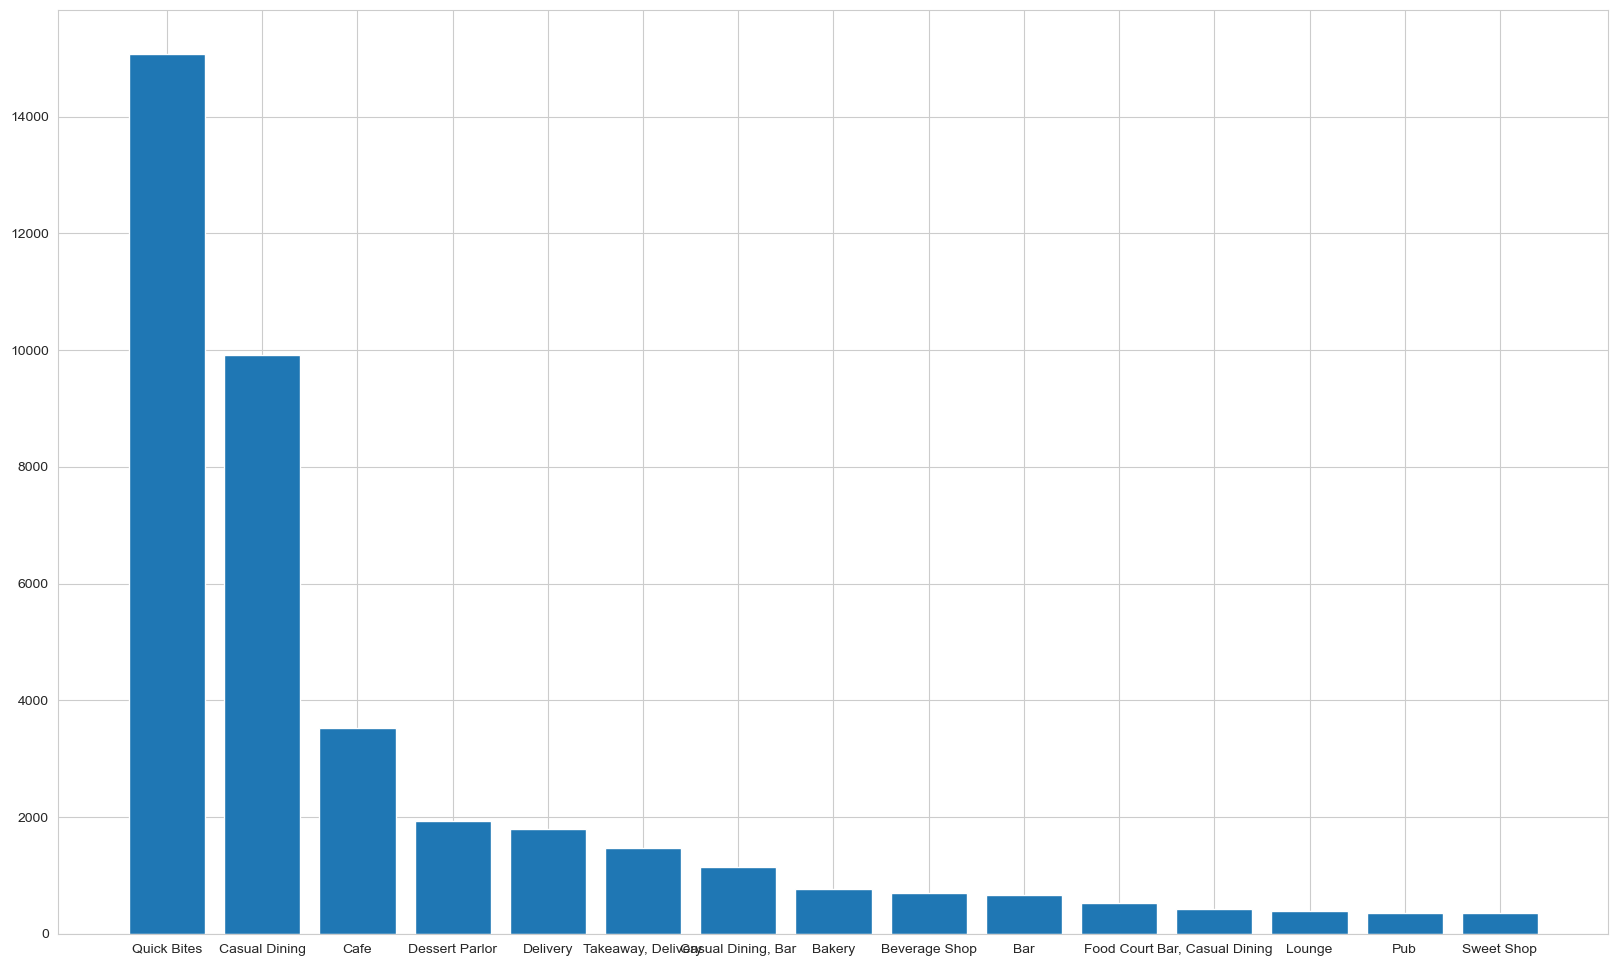

In [43]:
plt.figure(figsize=(20,12))
rest_typ = copy_df.rest_type.value_counts()[0:15]
plt.bar(rest_typ.index,rest_typ)

plt.show()


# Conclusion- This is the distribution of type of resturants and we observe that Quick bites at the top...further this is the dataset of banglore city, so most of the people living there prefer quick bites(fast food chains)

# 6) Votes-

# Question:
# Which "restaurant" had the highest "voting"? (means count of rating given)
# How many "votes" has each "type of restaurant" received from customers?

In [44]:
copy_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [45]:
voting = copy_df.groupby('name')[['votes']].mean()
voting

,votes
name,
#FeelTheROLL,7.000000
#L-81 Cafe,48.000000
#refuel,37.000000
1000 B.C,49.000000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,41.000000
...,...
i-Bar - The Park Bangalore,619.727273
iFruit Live Ice Creams,10.000000
iSpice Resto Cafe,30.142857


In [46]:
voting['votes'].describe()

count     7162.000000
mean       201.484245
std        607.015608
min          0.000000
25%         10.400000
50%         38.750000
75%        146.797414
max      16588.500000
Name: votes, dtype: float64

In [47]:
high_vot = voting[voting['votes'] >5000]

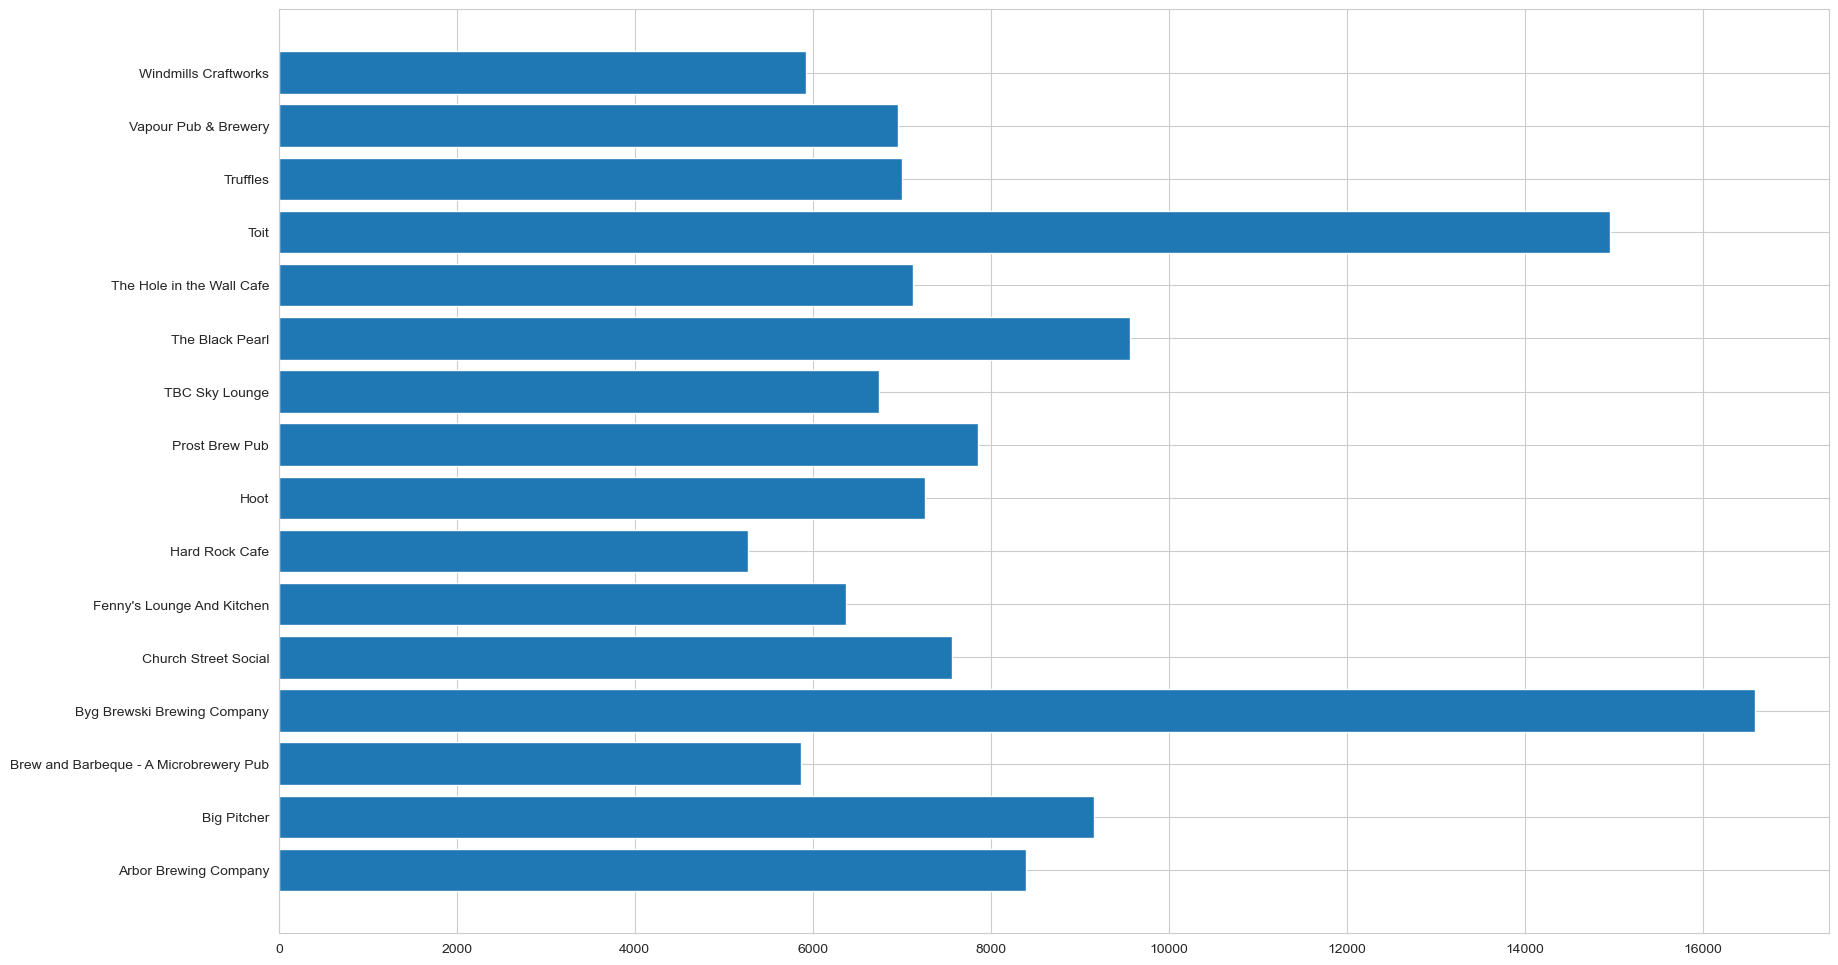

In [48]:
plt.figure(figsize=(20,12),dpi=100)

plt.barh(high_vot.index,high_vot['votes'])

plt.show()

This is the barplot for count of ratings given by consumers to a particular resturant

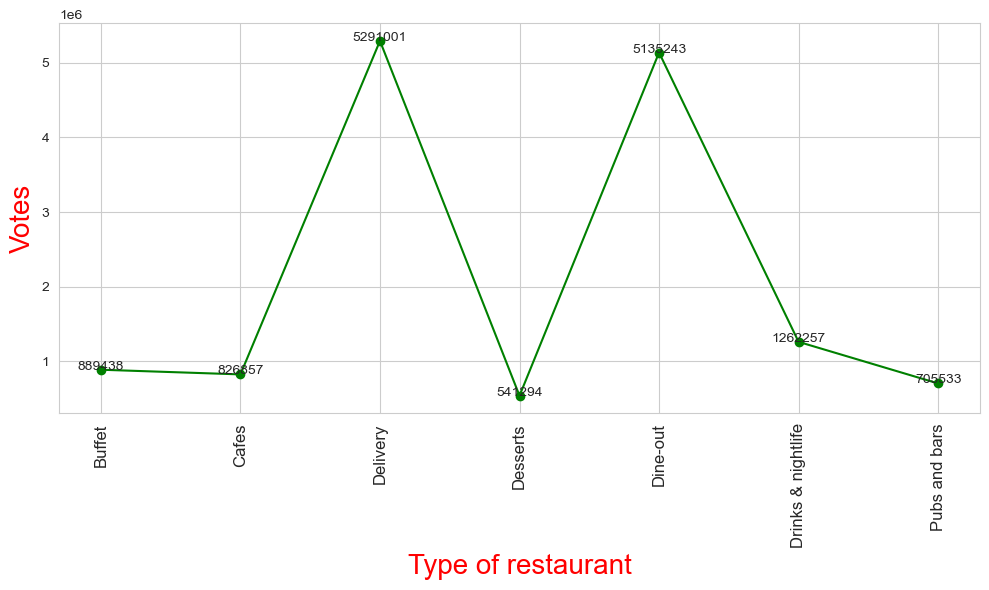

In [49]:
#How many "votes" has each "type of restaurant" received from customers?

grouped_data = copy_df.groupby('listed_in(type)')["votes"].sum()
result = pd.DataFrame({"votes": grouped_data})

plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
plt.plot(result, c="green", marker="o")

# Rotate x-axis labels for clarity
plt.xticks(rotation=90, size=12)

# Adding exact vote counts to the plot
for i, v in enumerate(result["votes"]):
    plt.text(i, v + 100, str(v), ha="center", fontsize=10)

# Labeling the axes with red color and larger size
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

plt.tight_layout()  # Adjust layout to ensure labels fit
plt.show()




# Conclusion- "delivery" listed_in(type) received maximum number of votes i.e 5291001 votes and "pubs and bars" received minimum votes i.e 705633 votes from the customers. 

In [50]:
## Lets' analyse the highly rated restaurants and worst restaurants based on number of ratings given

In [51]:
copy_df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet


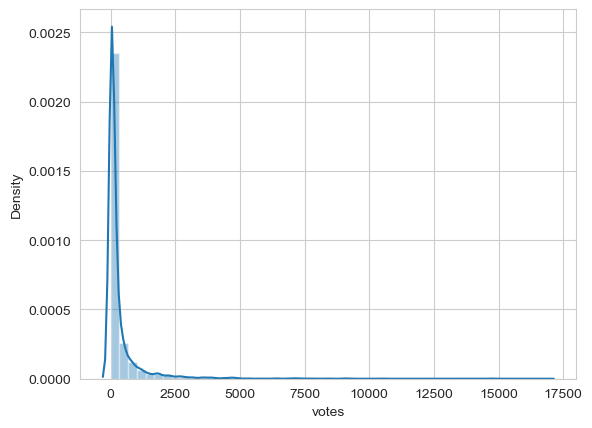

In [52]:
sns.distplot(copy_df['votes'])

plt.show()

In [54]:
voting_rating = copy_df.groupby('name')[['votes']].mean().sort_values('votes',ascending=False)
voting_rating

,votes
name,
Byg Brewski Brewing Company,16588.500000
Toit,14956.000000
The Black Pearl,9562.333333
Big Pitcher,9164.500000
Arbor Brewing Company,8396.545455
...,...
NutriFit,0.000000
Cross Roads Inn,0.000000
Crown Resto,0.000000


In [55]:
voting_rating['name'] = voting_rating.index

In [56]:
voting_rating = voting_rating.reset_index(drop=True)

voting_rating.head()

,votes,name
0,16588.500000,Byg Brewski Brewing Company
1,14956.000000,Toit
2,9562.333333,The Black Pearl
3,9164.500000,Big Pitcher
4,8396.545455,Arbor Brewing Company


In [57]:
voting_rating = pd.merge(voting_rating,copy_df[['rate','name']])
voting_rating

,votes,name,rate
0,16588.5,Byg Brewski Brewing Company,4.9
1,16588.5,Byg Brewski Brewing Company,4.9
2,16588.5,Byg Brewski Brewing Company,4.9
3,16588.5,Byg Brewski Brewing Company,4.9
4,16588.5,Byg Brewski Brewing Company,4.9
...,...,...,...
43937,0.0,Lazzet Lee,0.0
43938,0.0,Lazzet Lee,0.0
43939,0.0,Lazzet Lee,0.0
43940,0.0,Lazzet Lee,0.0


In [58]:
vote_top = voting_rating[voting_rating['votes'] > 5000]
vote_top.head()

,votes,name,rate
0,16588.5,Byg Brewski Brewing Company,4.9
1,16588.5,Byg Brewski Brewing Company,4.9
2,16588.5,Byg Brewski Brewing Company,4.9
3,16588.5,Byg Brewski Brewing Company,4.9
4,16588.5,Byg Brewski Brewing Company,4.9


In [59]:
vote_top = vote_top.groupby('name')[['rate']].mean().sort_values('rate',ascending=False)
vote_top

,rate
name,
Byg Brewski Brewing Company,4.900000
The Black Pearl,4.727778
TBC Sky Lounge,4.700000
Toit,4.700000
Big Pitcher,4.650000
Brew and Barbeque - A Microbrewery Pub,4.620000
The Hole in the Wall Cafe,4.600000
Windmills Craftworks,4.600000
Truffles,4.595349


### Highest rated based on most number of votes

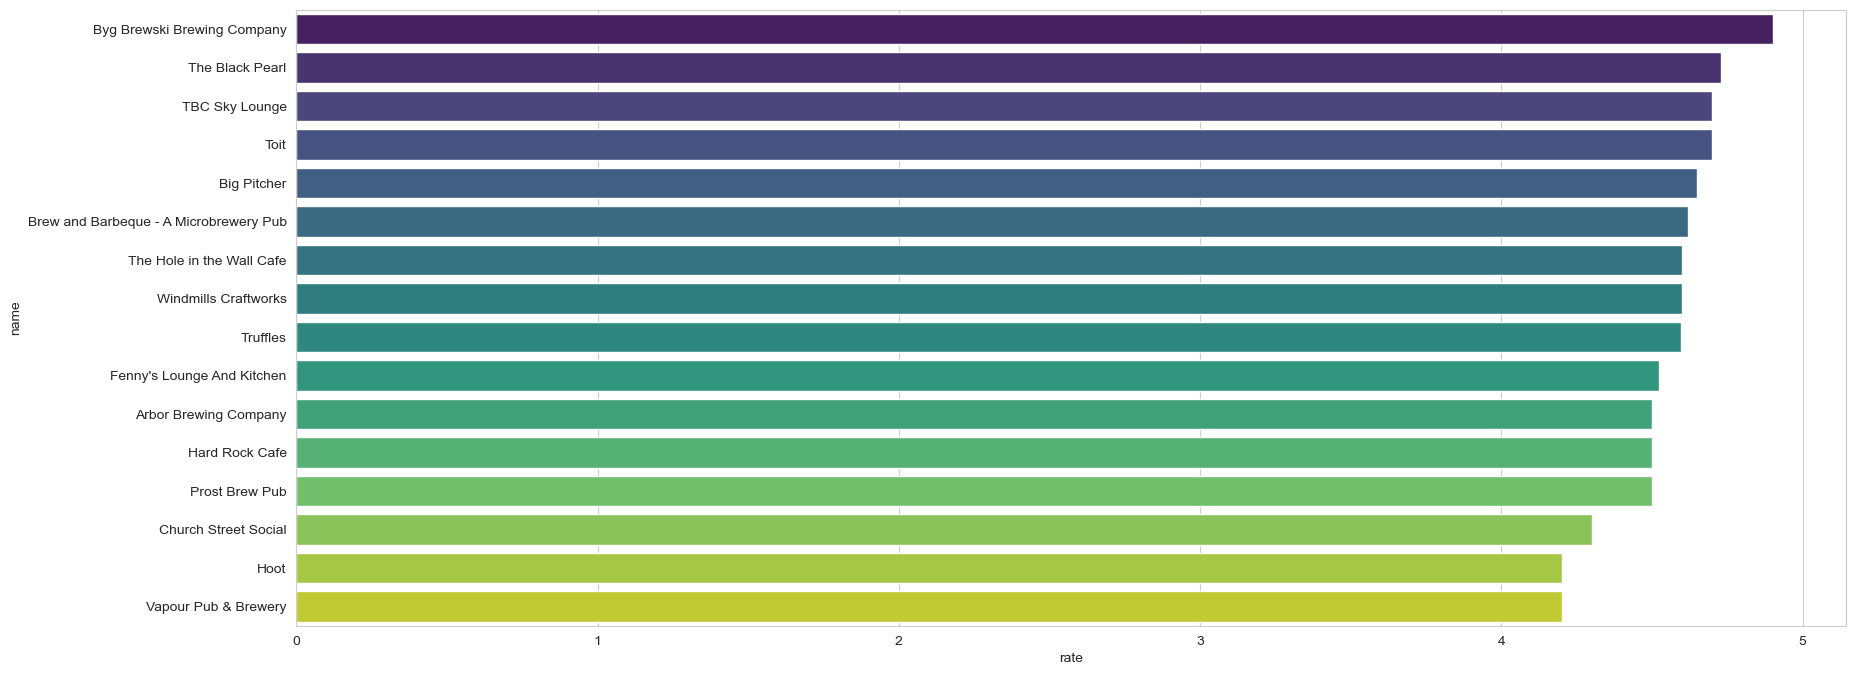

In [60]:
plt.figure(figsize=(20,8),dpi=100)

sns.barplot(x='rate',y=vote_top.index, data=vote_top, orient='h', palette="viridis")

plt.show()

# Conclusion- 'Byg Brewski Brewing Company' is the most voted resturant with the average rating of 4.9

In [61]:
bad_count = voting_rating[(voting_rating['rate'] < 3) & (voting_rating['rate'] > 0)]
bad_count

,votes,name,rate
3725,967.681818,Kritunga Restaurant,2.6
3726,967.681818,Kritunga Restaurant,2.9
3727,967.681818,Kritunga Restaurant,2.9
3742,967.681818,Kritunga Restaurant,2.7
3743,967.681818,Kritunga Restaurant,2.7
...,...,...,...
42110,4.000000,Special Biriyani,2.9
42111,4.000000,Special Biriyani,2.9
42198,4.000000,Sandesh Restaurant,2.9
42311,2.500000,Kushi Meals,2.8


In [62]:
bad_restaurants = bad_count[bad_count['votes'] > 500].groupby('name')[['rate']].mean()
bad_restaurants

,rate
name,
Anjappar,2.833333
FreshMenu,2.800000
Kabab Magic,2.900000
Kritunga Restaurant,2.760000
Lakeview Milkbar,2.900000
Lazeez,2.600000
Moriz Restaurant,2.775000
Savoury Restaurant,2.900000
Smoke - The Sizzler House,2.800000


In [63]:
# Sort by 'rate' in descending order or to get the  bad_restaurants DataFrame sorted in descending order by the average 'rate'.
bad_restaurants = bad_restaurants.sort_values(by='rate', ascending=False)



# Display the sorted DataFrame
bad_restaurants.head()  # To view the top rows

,rate
name,
Kabab Magic,2.900000
Lakeview Milkbar,2.900000
Savoury Restaurant,2.900000
Anjappar,2.833333
FreshMenu,2.800000


### worst restaurants based on highest number of votes given


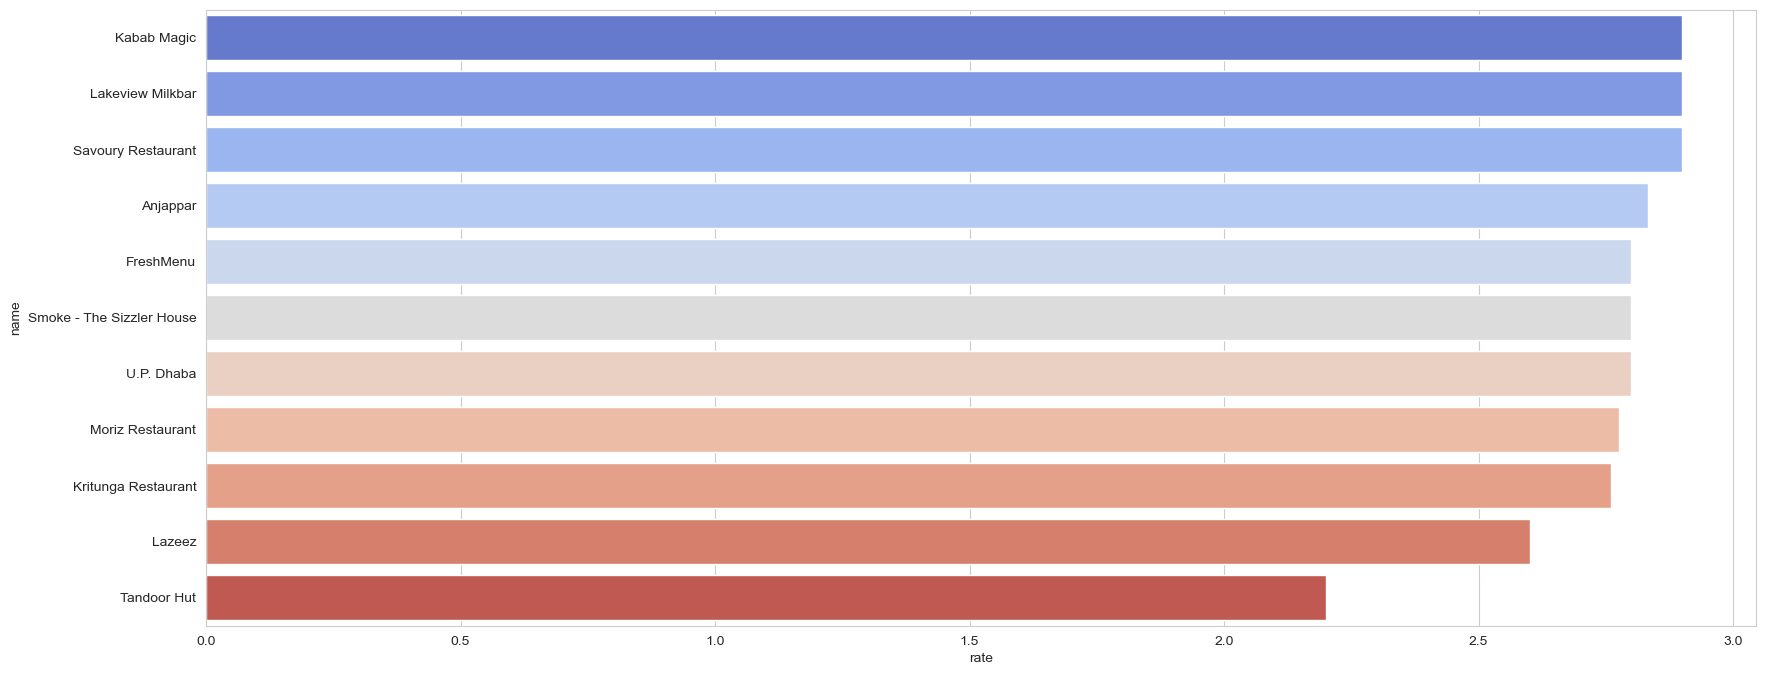

In [64]:
plt.figure(figsize=(20,8))

sns.barplot(x='rate',y=bad_restaurants.index, data=bad_restaurants, orient='h', palette='coolwarm')

plt.show()

These resturants have good votes given by the consumer but less rating..which means there is something wrong with these resturants.

# 7) location
# Question- In which location we have highest number of restaurants?

In [65]:
copy_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [66]:
location_restro = copy_df[['location']].value_counts()[0:20]
location_restro

location             
BTM                      4261
Koramangala 5th Block    2381
HSR                      2128
Indiranagar              1936
JP Nagar                 1849
Jayanagar                1718
Whitefield               1693
Marathahalli             1503
Bannerghatta Road        1324
Koramangala 6th Block    1111
Koramangala 7th Block    1089
Brigade Road             1084
Bellandur                1078
Koramangala 1st Block     965
Electronic City           964
Sarjapur Road             919
Ulsoor                    901
Koramangala 4th Block     864
MG Road                   836
Banashankari              805
dtype: int64

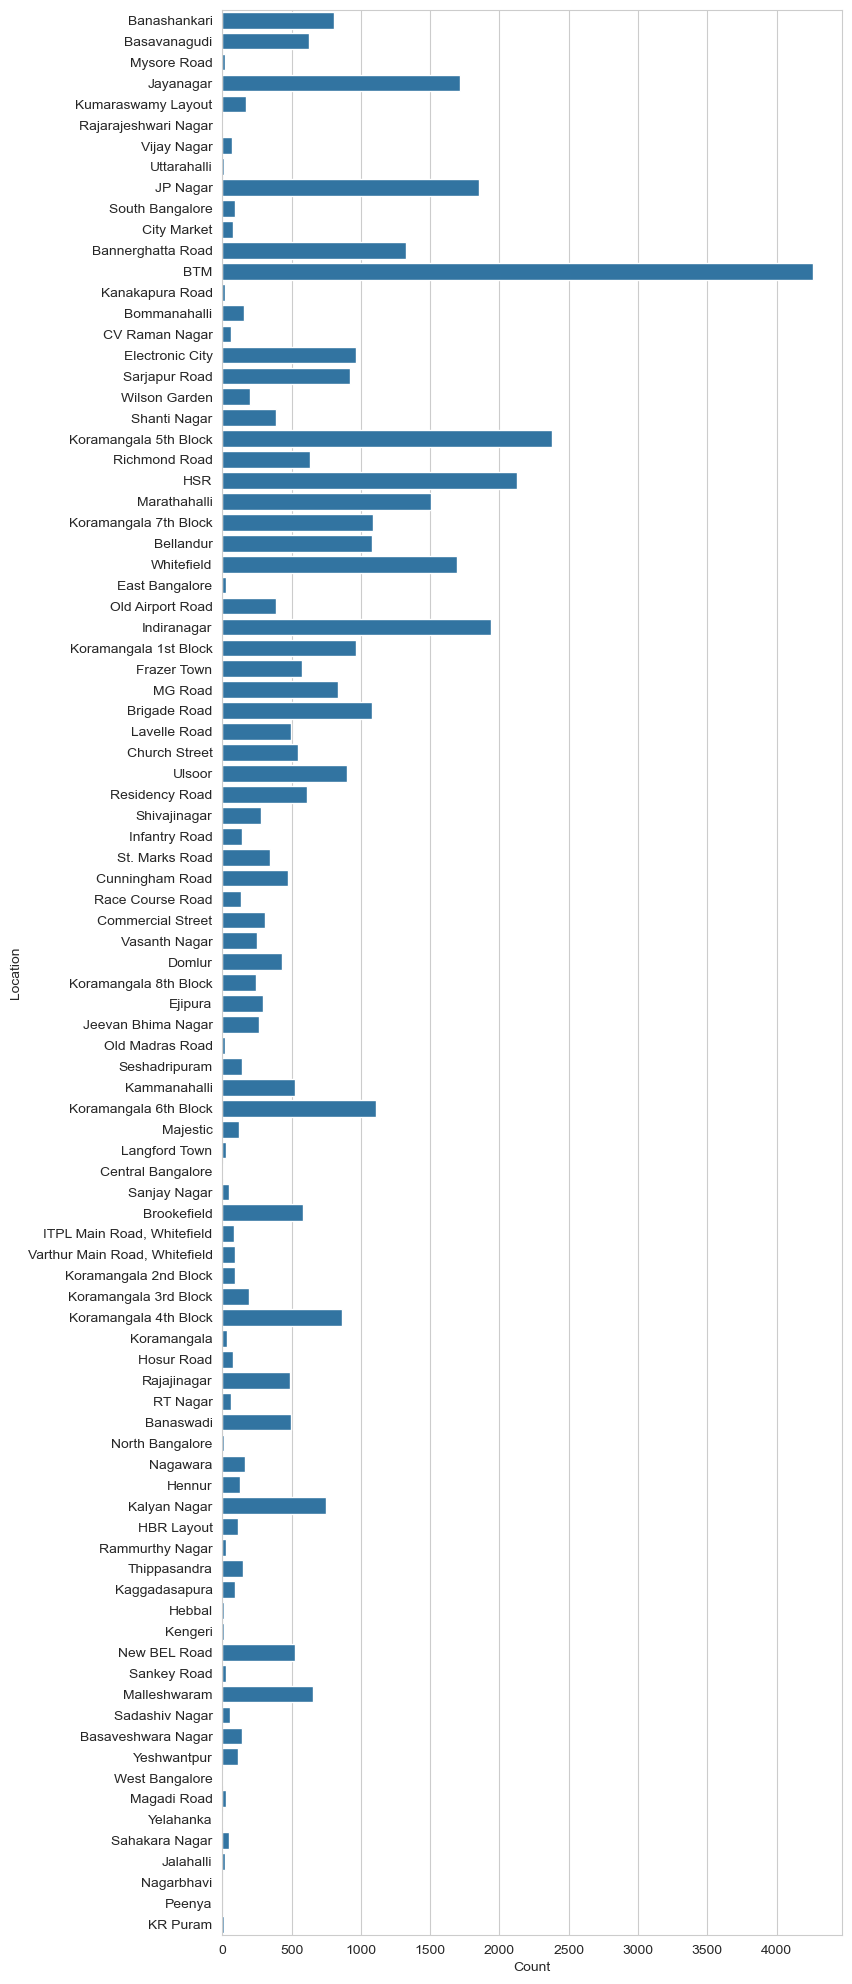

In [67]:
plt.figure(figsize=(8, 25))  # Adjust the figure size to make it taller

sns.countplot(y='location', data=copy_df)  # Change the orientation to horizontal by setting y instead of x

plt.xticks(rotation=0)  # Keep x-ticks horizontal since it's now the count axis
plt.xlabel("Count")  # Label the x-axis
plt.ylabel("Location")  # Label the y-axis

plt.show()



Barplot of number of restaurants in any location

# 8) cuisines- 
# Question- Identify the top 10 cuisines

In [68]:
copy_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [69]:
copy_df.rest_type.value_counts()

Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

North Indian                           2294
North Indian, Chinese                  2060
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 641
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: cuisines, dtype: int64


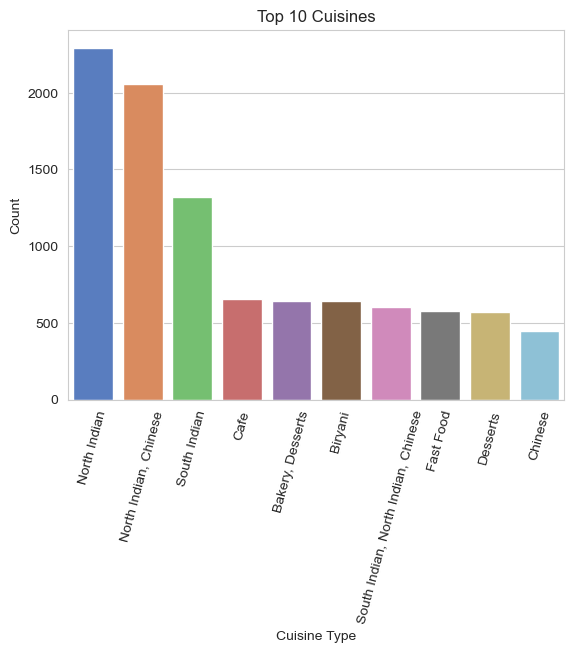

In [70]:
cuisine = copy_df.cuisines.value_counts()[0:10]
print(cuisine)

# Create the barplot with specified x and y arguments and a color palette
sns.barplot(x=cuisine.index, y=cuisine.values, palette='muted')

plt.xticks(rotation=75)  # Rotate the x-axis labels for better readability
plt.xlabel("Cuisine Type")  # Label the x-axis
plt.ylabel("Count")  # Label the y-axis
plt.title("Top 10 Cuisines")  # Add a title to the plot

plt.show()


Barplot of Top 10 cusisines preferred by customers

# 9) listed_in(type)-
# Question- which type of restaurant received more offline orders, so that Zomato can provide customers with some good offers?

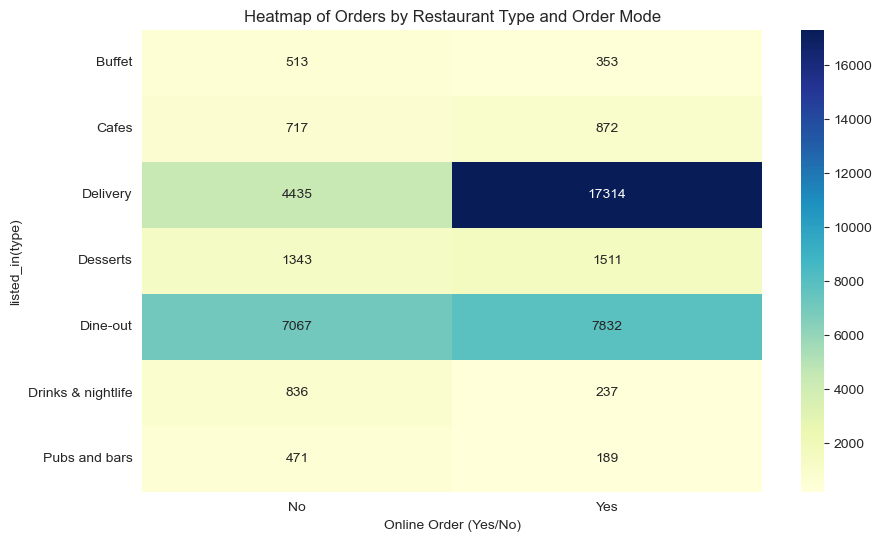

In [85]:
# Create the pivot table
pivot_table = copy_df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')

# Add labels and title
plt.title("Heatmap of Orders by Restaurant Type and Order Mode")
plt.xlabel("Online Order (Yes/No)")
plt.ylabel("listed_in(type)")

# Display the heatmap
plt.show()


# Conclusion- Dine-out restaurant primarily accept offline orders whereas Delivery primarily receives online orders. This suggests that customers prefers offline orders in person at restaurants, but prefer online ordering at "Delivery" listed_in(type).

# 10) approx_cost(for two people) - 

# Question- Zomato has observed that most couples order most of their food online. What is their average spending on each other / or CHeck the distribution for cost of 2 people?

In [71]:
copy_df['approx_cost(for two people)'].isna().sum()

252

In [72]:
copy_df.dropna(axis=0,subset=['approx_cost(for two people)'],inplace=True)

In [73]:
copy_df['approx_cost(for two people)']

0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 43690, dtype: object

In [74]:
copy_df['approx_cost(for two people)'] = copy_df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [75]:
copy_df['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51709     800
51711     800
51712    1500
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 43690, dtype: object

In [76]:
copy_df['approx_cost(for two people)'] = copy_df['approx_cost(for two people)'].astype(int)

In [77]:
copy_df['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51709     800
51711     800
51712    1500
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 43690, dtype: int32

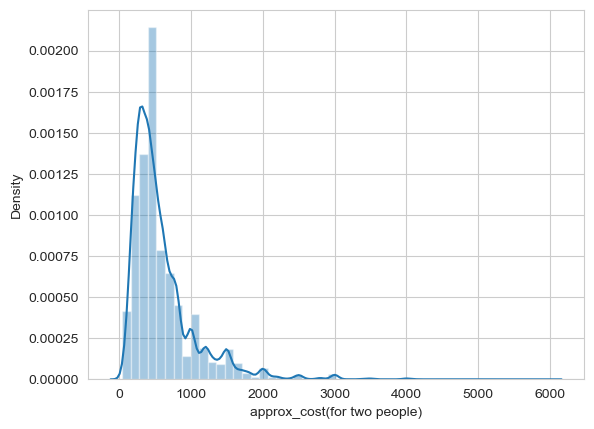

In [78]:
sns.distplot(copy_df['approx_cost(for two people)'])



plt.show()

In [79]:
copy_df['approx_cost(for two people)'].describe()

count    43690.000000
mean       594.270222
std        458.761551
min         40.000000
25%        300.000000
50%        450.000000
75%        700.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

In [80]:
copy_df[copy_df['approx_cost(for two people)'] > 2000]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
3310,Beetle Juice Bar - Springs Hotel & Spa,No,Yes,3.7,64,Basavanagudi,Bar,Rooftop Ambience,Finger Food,2200,Dine-out
3736,Beetle Juice Bar - Springs Hotel & Spa,No,Yes,3.7,64,Basavanagudi,Bar,Rooftop Ambience,Finger Food,2200,Drinks & nightlife
4820,The Square - Novotel,No,Yes,4.3,760,Marathahalli,Fine Dining,"Breakfast Buffet, Cocktails, Sunday Brunch, No...","Continental, North Indian, Japanese, Italian",2500,Dine-out
4861,Chez Nous - Novotel,No,Yes,3.9,125,Marathahalli,Lounge,"Coffee, Cocktails, Tiramisu, Cappuccino, Hot C...","European, French, North Indian",2500,Dine-out
4953,Chez Nous - Novotel,No,Yes,3.9,125,Marathahalli,Lounge,"Coffee, Cocktails, Tiramisu, Cappuccino, Hot C...","European, French, North Indian",2500,Drinks & nightlife
...,...,...,...,...,...,...,...,...,...,...,...
51666,Bling - The Zuri,No,No,3.7,228,Whitefield,Lounge,"Martini, Cocktails, Paneer Tikka","Continental, North Indian",2100,Drinks & nightlife
51681,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500,Drinks & nightlife
51685,Biergarten,No,Yes,4.7,7064,Whitefield,"Microbrewery, Pub","Wheat Beer, Risotto, Craft Beer, Caesar Salad,...","Continental, European, BBQ, Chinese, Asian",2400,Pubs and bars
51686,Windmills Craftworks,No,No,4.6,5954,Whitefield,"Microbrewery, Pub","Keema Pav, Cocktails, Craft Beer, Pork Chops, ...","American, North Indian, Salad",2500,Pubs and bars


# Conclusion- Distibution of cost for 2 people in resturants most of the restaurants costs below Rs.1000

# Conclusions:

1. Asia Kitchen By Mainland China,Spa Cuisine,Byg Brewski Brewing Company,Punjab Grill	were the best rated Restaurants.

2. Cafe Coffee Day, Onesta, Empire Restaurant, Just Bake ,Kanti sweets were the top restaurant chains.
           
3. 64.4% of resturants accept online orders where as 35.6% donot accept online orders.

4. Based on most voted resaturants Byg Brewski Brewing Company and The Black Pearl	were the best rated restaurants.

5. Based on most voted resaturants Lazeez and Tandoor Hut were the worst rated restaurants.

6. BTM, Koramangala 5th Block has the most numbers of restaurants.

7. North Indian and Chinese were the top favourite of the people in Bangalore.

8. Cost for 2 people for most restaurants was varing from 500 to 1000 bucks.

# Inferences and Conclusions


In [ ]:
# Inferences and Conclusions

Problem statements


1) rate

# Question:
# PROBLEM STATEMENT-calculate avg rating for each restaurant?
ANS- Asia Kitchen By Mainland China,Spa Cuisine,Byg Brewski Brewing Company,Punjab Grill	were the best rated Restaurants.

# PROBLEM STATEMENT-What are the ratings that the majority of the restaurants have recieved or the distribution of ratings? 
ANS-Majority of restaurants have received the ratings from 2.5 to 4.5


2) name- 
#PROBLEM STATEMENT-Name the top restaurant chains?
ANS- Cafe Coffee Day, Onesta, Empire Restaurant, Just Bake ,Kanti sweets were the top restaurant chains.
           
 
3) online_order-
#PROBLEM STATEMENT-How many restaurants don't accept online orders?
ANS- 64.4% of resturants accept online orders where as 35.6% donot accept online orders.

# PROBLEM STATEMENT-which mode (online or offline) has received the maximum rating?
ANS- we see that offline order received lower rating in comaparison to online_order.


4) book_table- 
#PROBLEM STATEMENT- How many reastaurants had TABLE BOOKINGS?
ANS- we observe here that around 85.4% resturants have table bookings.


5) rest_type 
#PROBLEM STATEMENT-What type of restaurant do the majority of customers order from?
ANS- We see that majority of the customers (nearly 23000 of the orders are placed) from "Delivery" rest_type.

#PROBLEM STATEMENT- Also which restaurant type most of the people living there prefer?
ANS-we observe that Quick bites at the top...further this is the dataset of banglore city, so most of the people living there
prefer quick bites(fast food chains)


6) votes
#PROBLEM STATEMENT-Which "restaurant" had the highest "voting"? (means count of rating given)
ANS- Based on most voted restaurants Byg Brewski Brewing Company and The Black Pearl	were the best rated restaurants.
Also, Based on most voted restaurants Lazeez and Tandoor Hut were the worst rated restaurants.

# PROBLEM STATEMENT-How many "votes" has each "type of restaurant" received from customers?
ANS-"delivery" listed_in(type) received maximum number of votes i.e 5291001 votes and "pubs and bars" received minimum votes i.e 705633 votes from the customers. 


7) location
#PROBLEM STATEMENT-In which location we have highest number of restaurants
ANS- BTM, Koramangala 5th Block has the most numbers of restaurants.


8) cuisines- 
#PROBLEM STATEMENT- Identify the top 10 cuisines
ANS- North Indian and Chinese were the top favourite of the people in Bangalore.


9) listed_in(type)-
#PROBLEM STATEMENT- which type of restaurant received more offline orders, so that Zomato can provide customers with some good offers?
ANS- Dine-out restaurant primarily accept offline orders whereas Delivery primarily receives online orders. 
This suggests that customers prefers offline orders in person at restaurants, but prefer online ordering at "Delivery" listed_in(type).¶


10) approx_cost(for two people)-
# PROBLEM STATEMENT-Zomato has observed that most couples order most of their food online. What is their average spending on each other / or CHeck the distribution for cost of 2 people?
ANS- Cost for 2 people for most restaurants was varing from 500 to 1000 bucks.
